## Course Announcements

Due today:
- D4
- Q4
- A2
- Weekly Project Survey (optional)

**Notes**
- Mid-course survey [now available](https://docs.google.com/forms/d/e/1FAIpQLScnSKBPghAVO-beIzUFQ4SCb0gw9TB7OotemA-RlAdKcQTroA/viewform?usp=sf_link) (optional; "due" Fri 5/7; link also on Canvas)

## Inference II: Building on Regression
- Association between variables: **correlation** (& causation)
- Visualizing multple linear regression
- Comparison of means: **t-test**

In [2]:
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# Statmodels & patsy
import patsy
import statsmodels.api as sm
from scipy.stats import pearsonr, norm, ttest_ind

import warnings
warnings.filterwarnings('ignore')

#improve resolution
%config InlineBackend.figure_format ='retina'

## Correlation: Pearson correlation ($r$)

- measures the strength of association between two variables 
- takes values [-1,1]

# Positive Correlation 
- $r$ > 0
- as $r$ approaches 1, x and y are highly correlated 

In [3]:
np.random.seed(1)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)
  
# Positive Correlation with some noise
y = x + np.random.normal(0, 10, 1000)

np.corrcoef(x, y)

array([[1.        , 0.81543901],
       [0.81543901, 1.        ]])

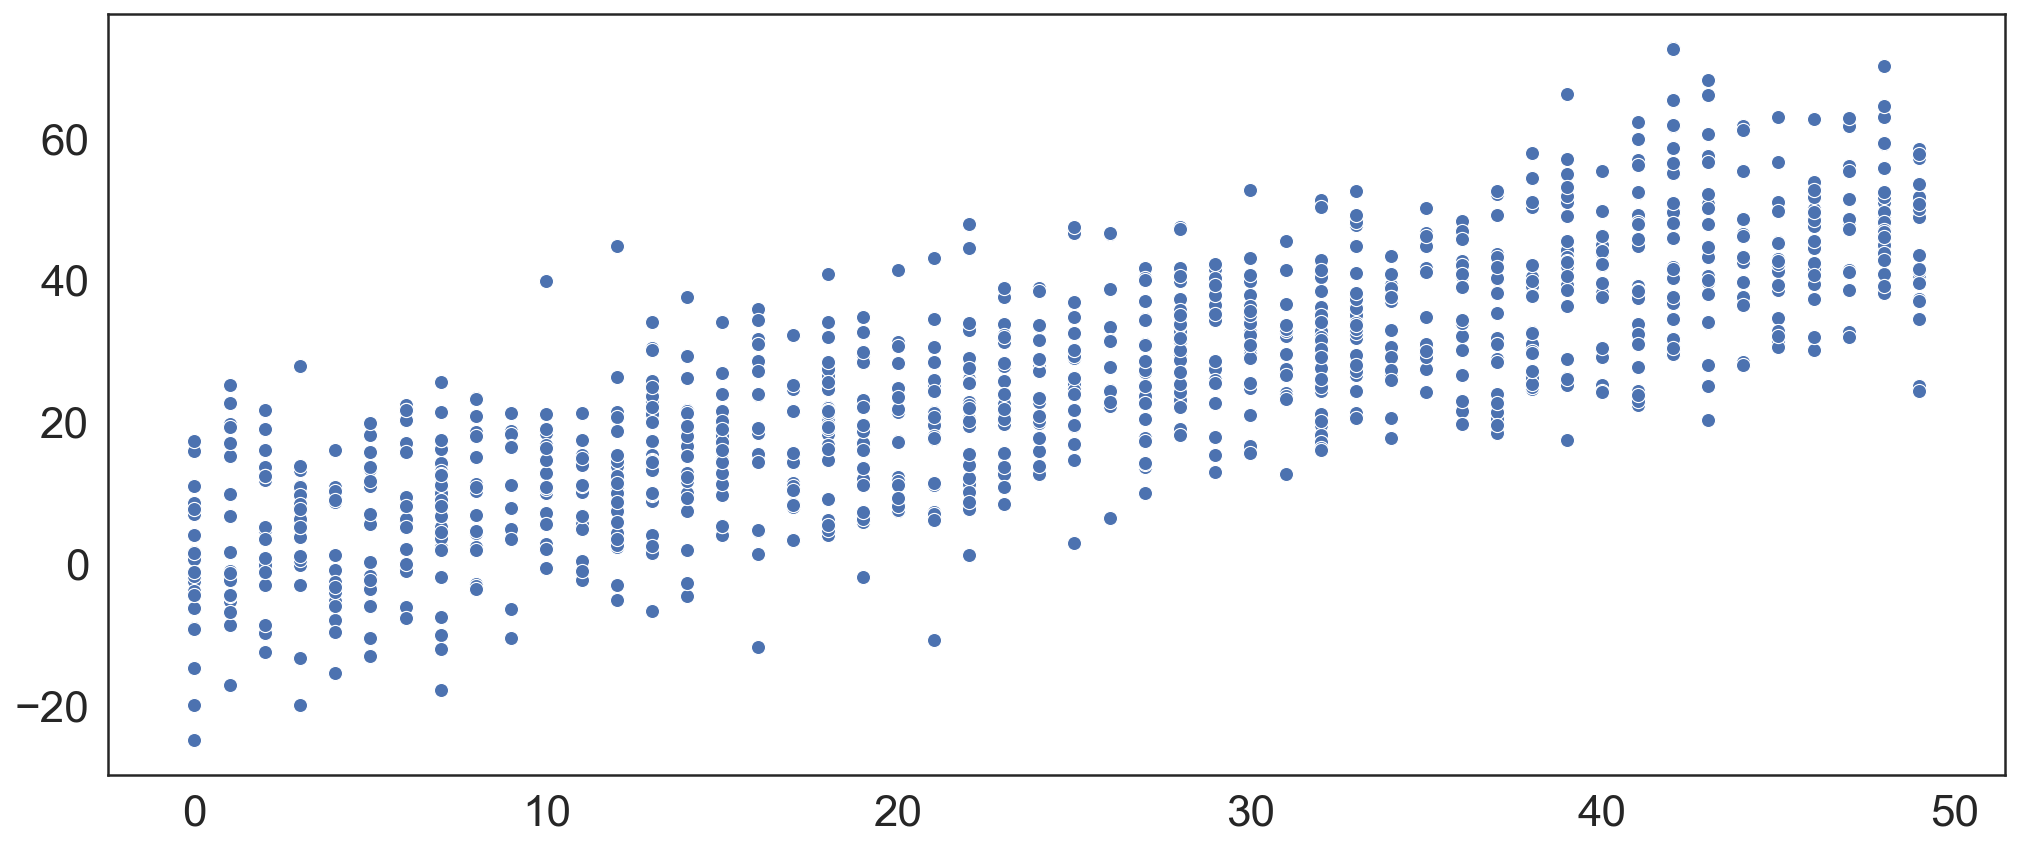

In [4]:
sns.scatterplot(x, y, s=50);

# Negative Correlation 
- $r$ < 0
- as $r$ approaches -1, x and y are highly negatively correlated 

In [5]:
x = np.random.randint(0, 50, 1000)

# Negative Correlation with some noise
y = 100 - x + np.random.normal(0, 5, 1000)

np.corrcoef(x, y)

array([[ 1.        , -0.94957116],
       [-0.94957116,  1.        ]])

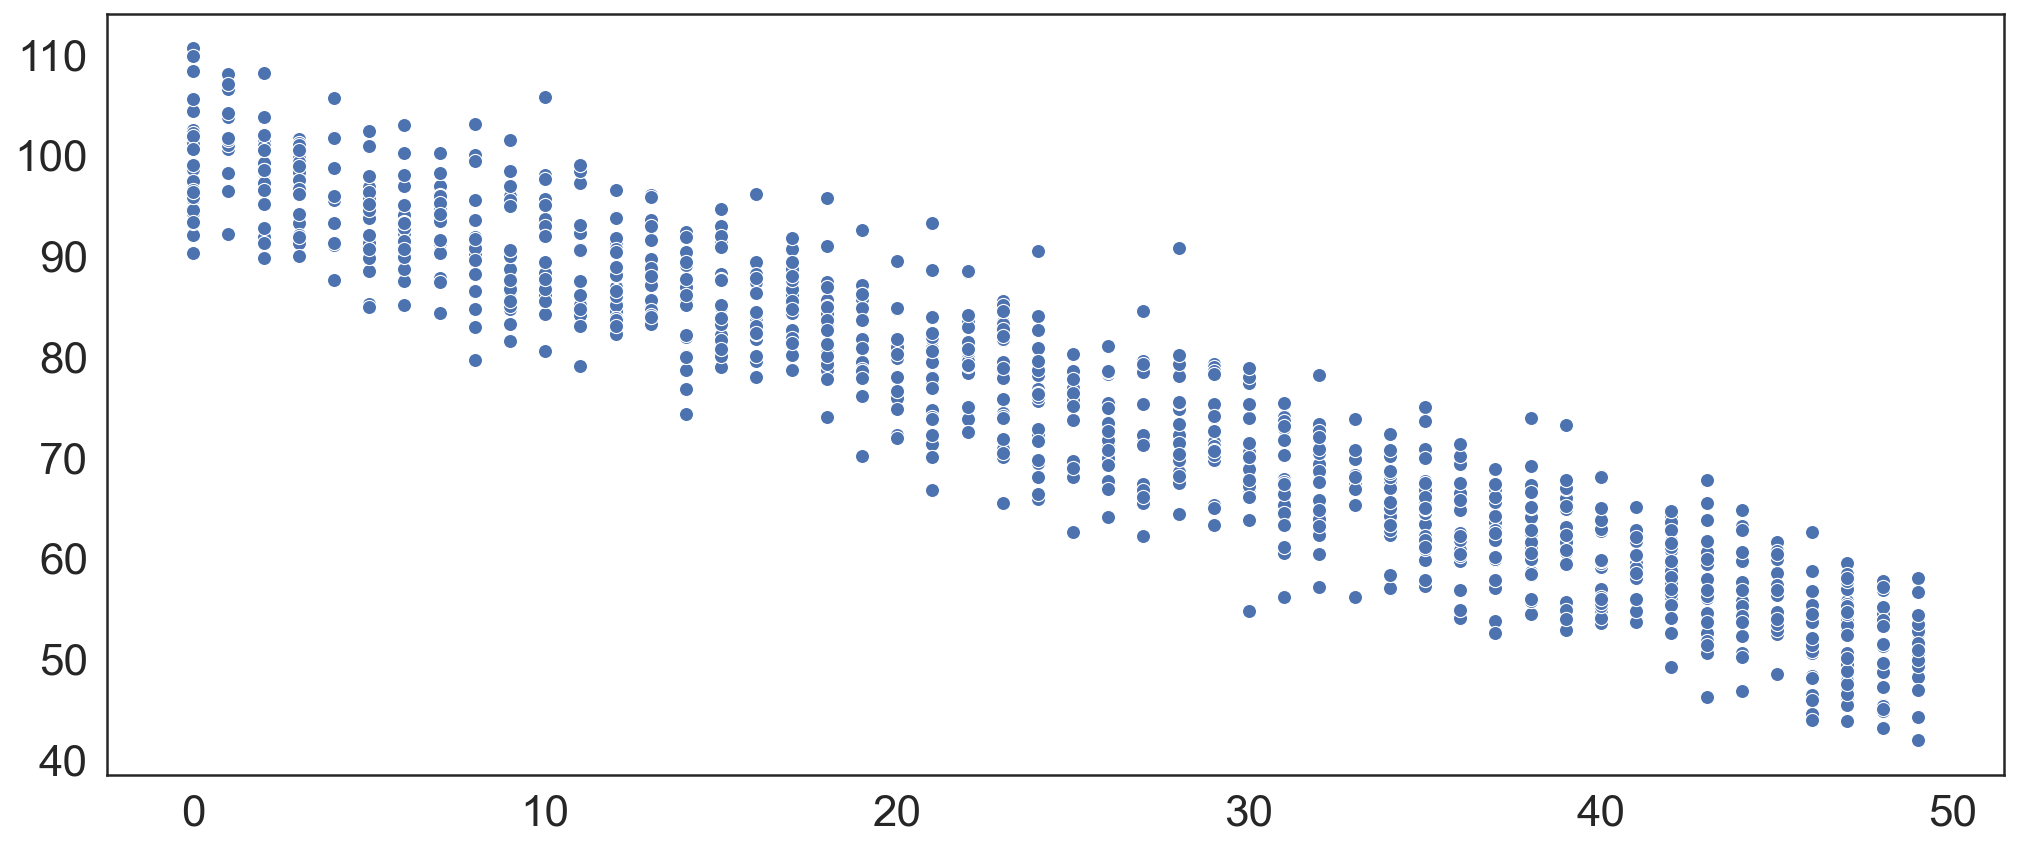

In [6]:
sns.scatterplot(x, y, s=50);

# No Correlation 
- $r \approx 0$
- as $r$ approaches 0, x and y are not correlated 

In [7]:
x = np.random.randint(0, 50, 1000)
y = np.random.randint(0, 50, 1000)

np.corrcoef(x, y)

array([[ 1.        , -0.00554681],
       [-0.00554681,  1.        ]])

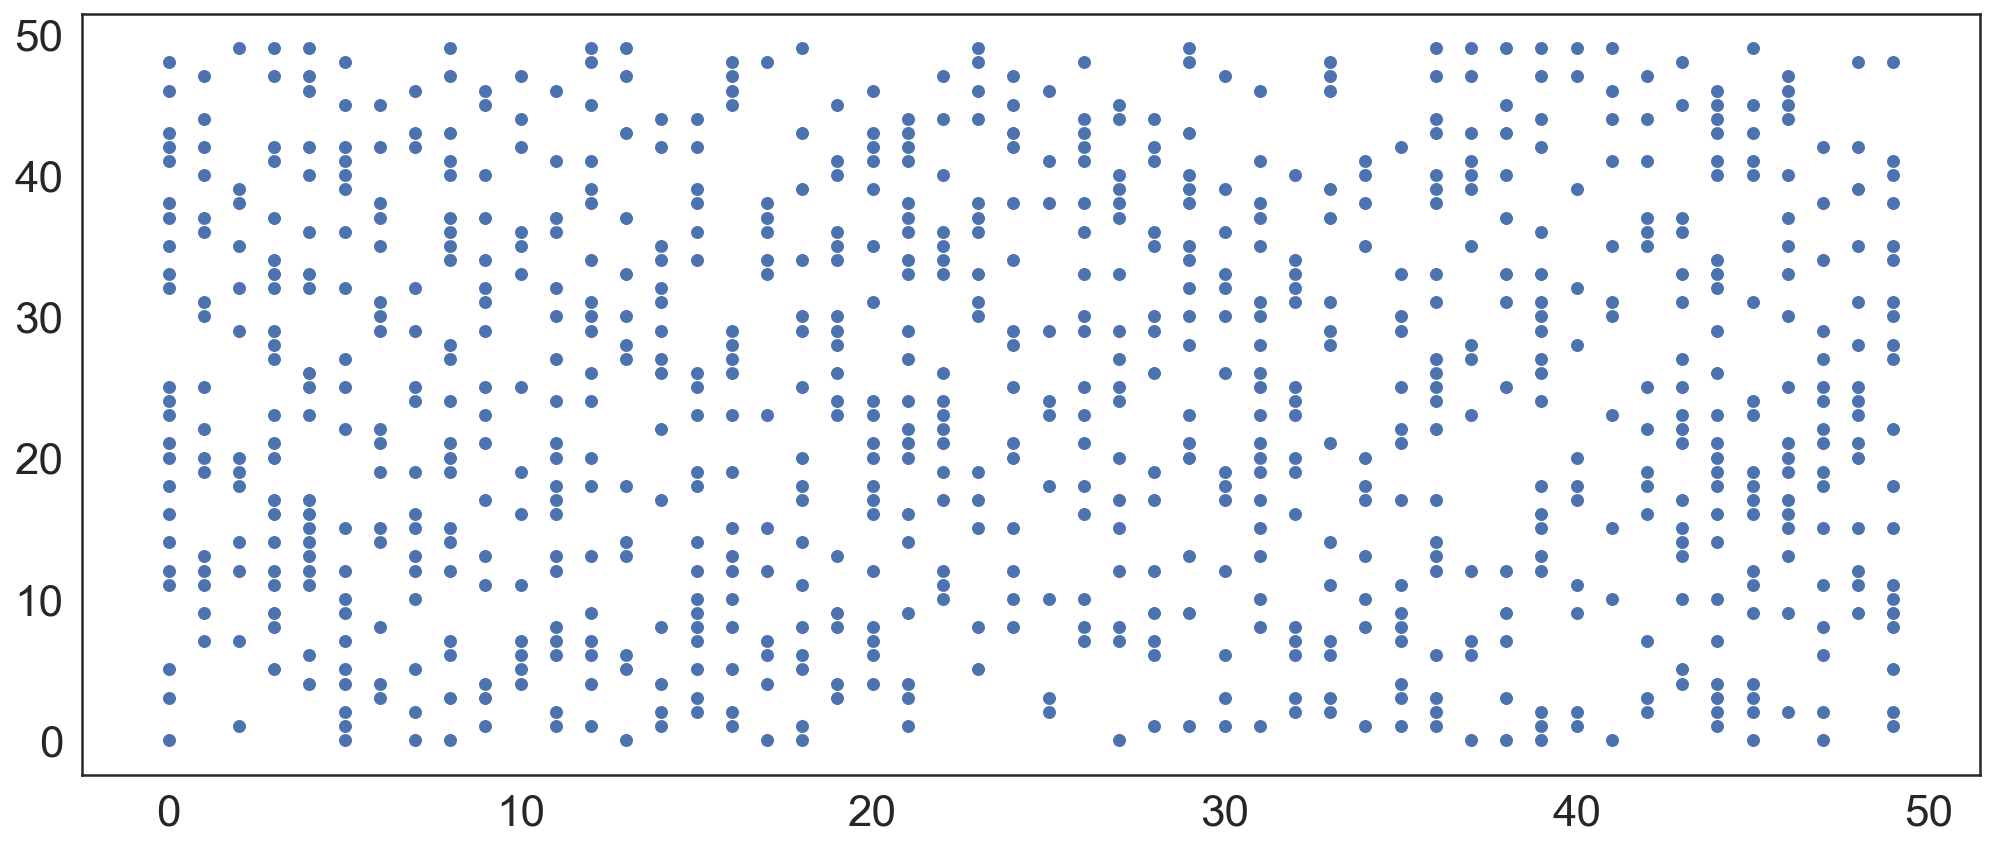

In [8]:
sns.scatterplot(x, y, s=50);

### Clicker Question #1

What would you expect Pearson correlation for the following relationship to be?

In [9]:
np.random.seed(888)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 200)
  
# Positive Correlation with some noise
y = x + np.random.normal(0, 10, 200)

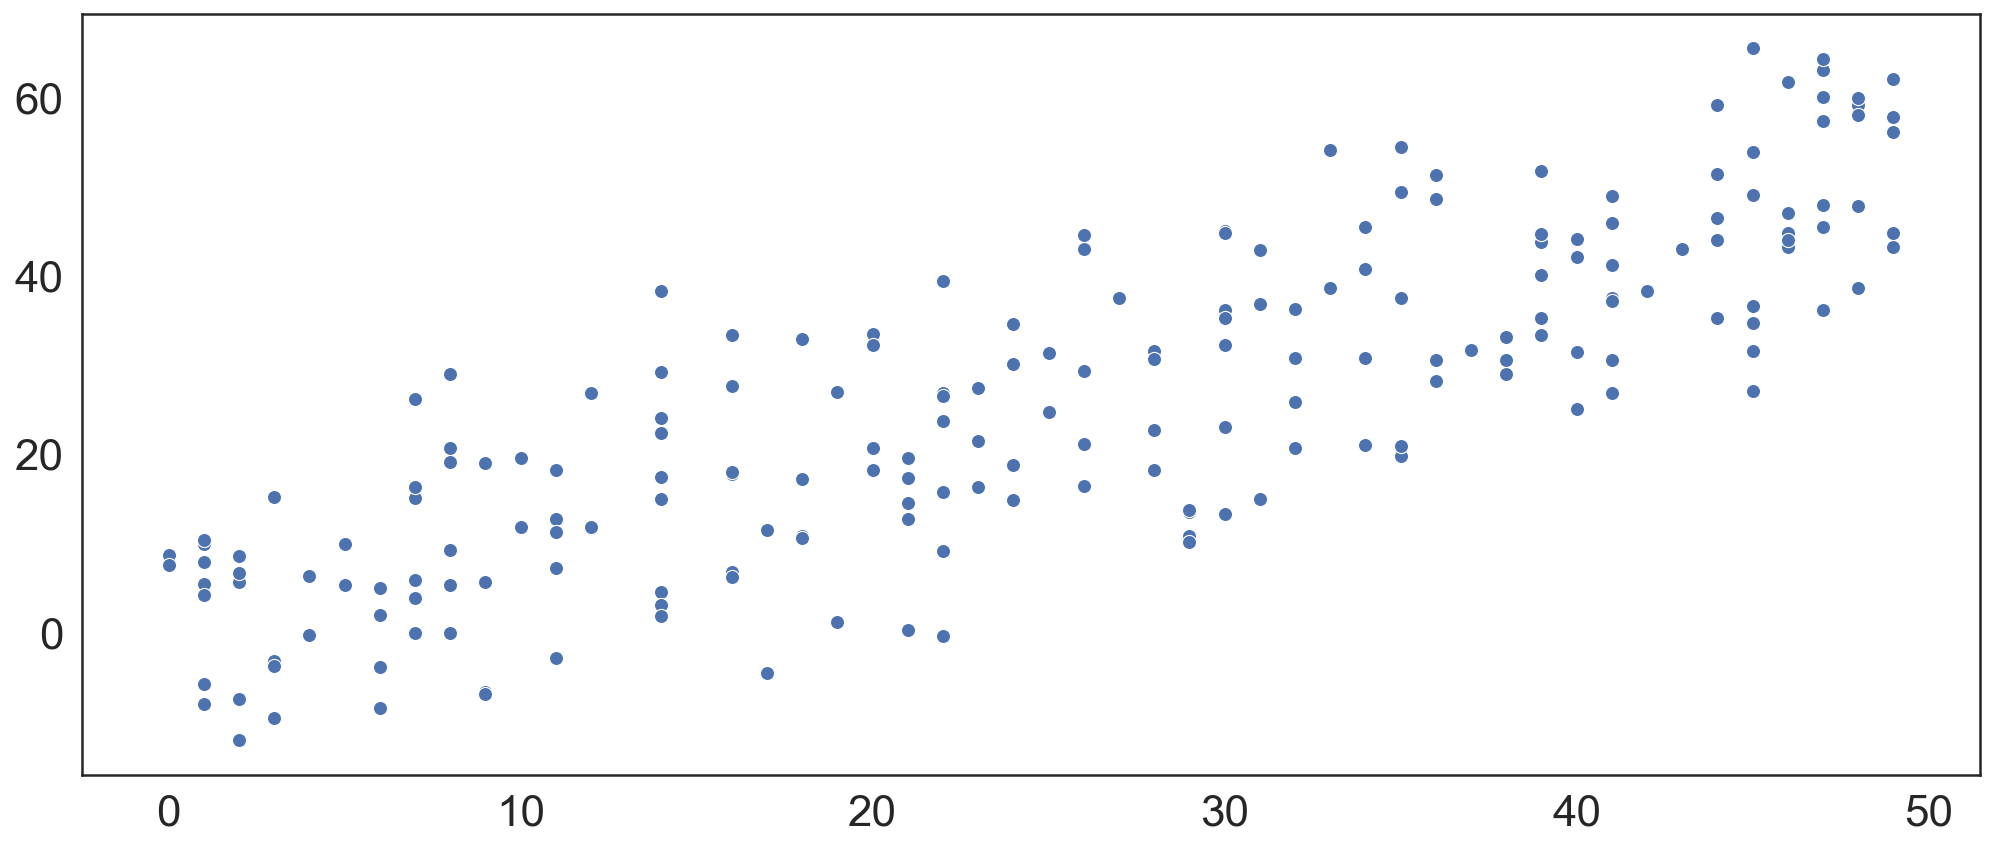

In [10]:
sns.scatterplot(x, y, s=50);

- A) -0.8
- B) -0.4
- C) 0
- D) 0.4
- E) 0.8

In [11]:
np.corrcoef(x, y)

array([[1.        , 0.83334929],
       [0.83334929, 1.        ]])

# Regression Reminder

$$outcome = \beta_0 + \beta_1*predictor$$

$\beta_1 \approx r $ if ...

- $predictor$ and $outcome$ each have a standard deviation of 1.

In [12]:
# inputs are mean, sd, and number of observations
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)

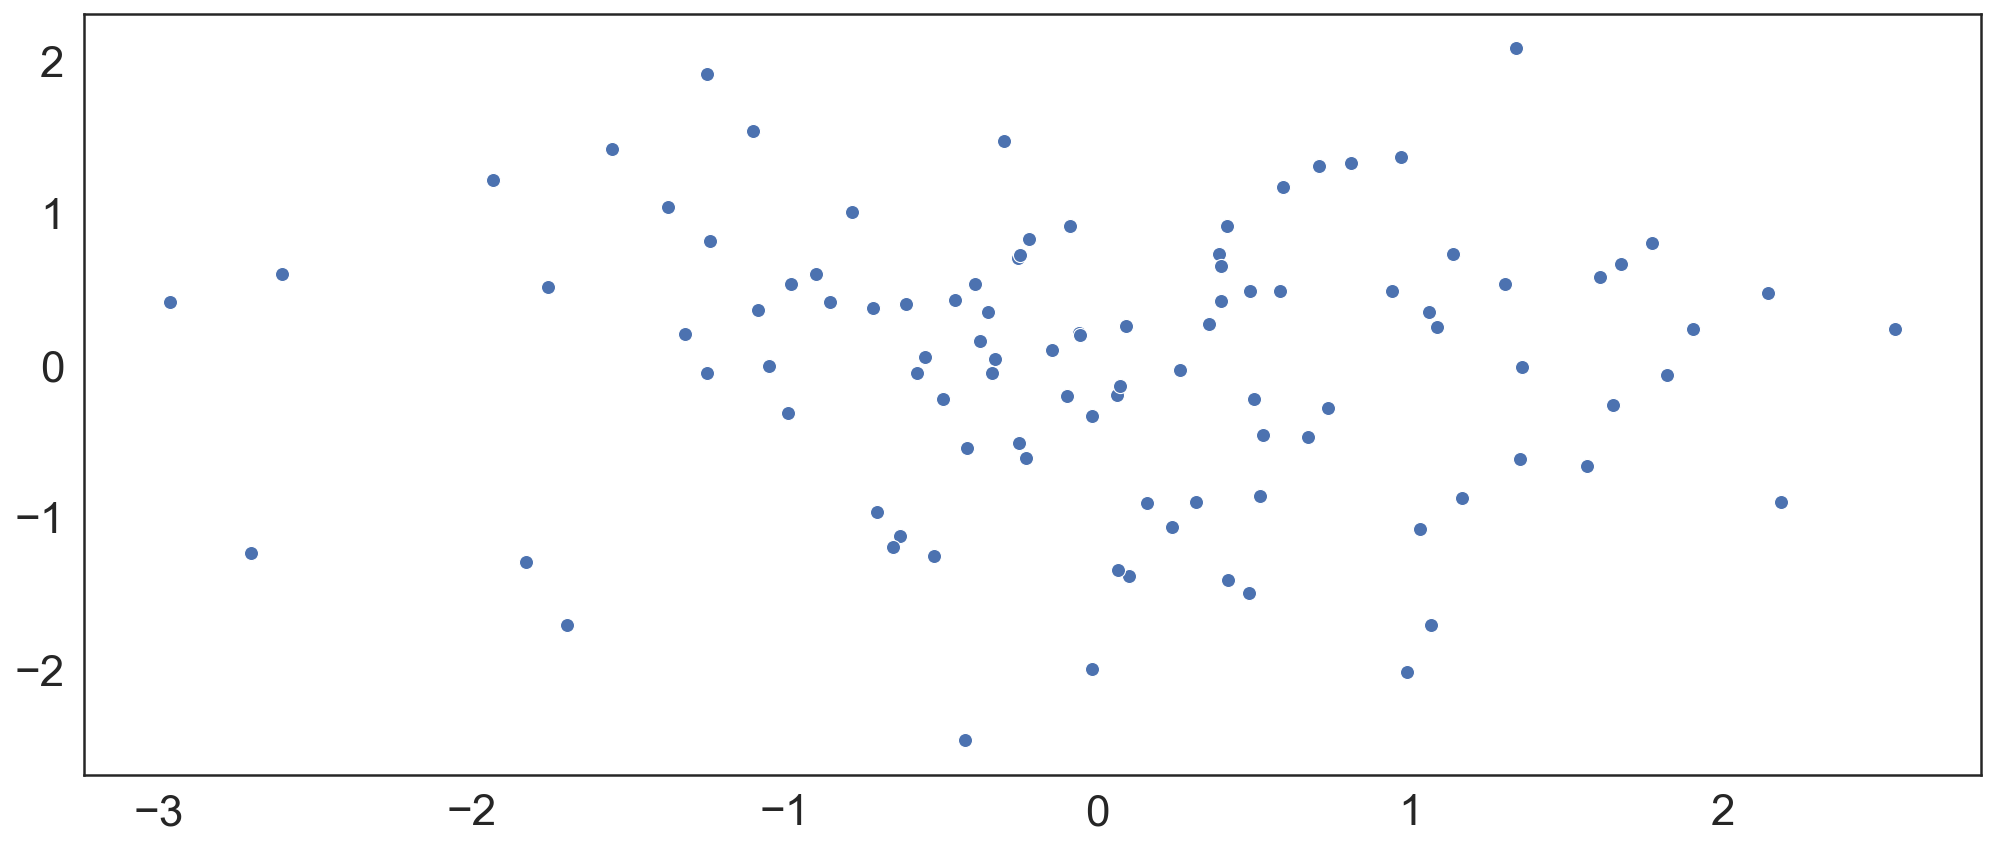

In [13]:
# look at the data
sns.scatterplot(x, y, s=50);

In [14]:
# regression as we've done previously
outcome, predictors = patsy.dmatrices('y ~ x')
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1281
Date:                Fri, 30 Apr 2021   Prob (F-statistic):              0.721
Time:                        09:48:53   Log-Likelihood:                -131.74
No. Observations:                 100   AIC:                             267.5
Df Residuals:                      98   BIC:                             272.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0135      0.091      0.148      0.8

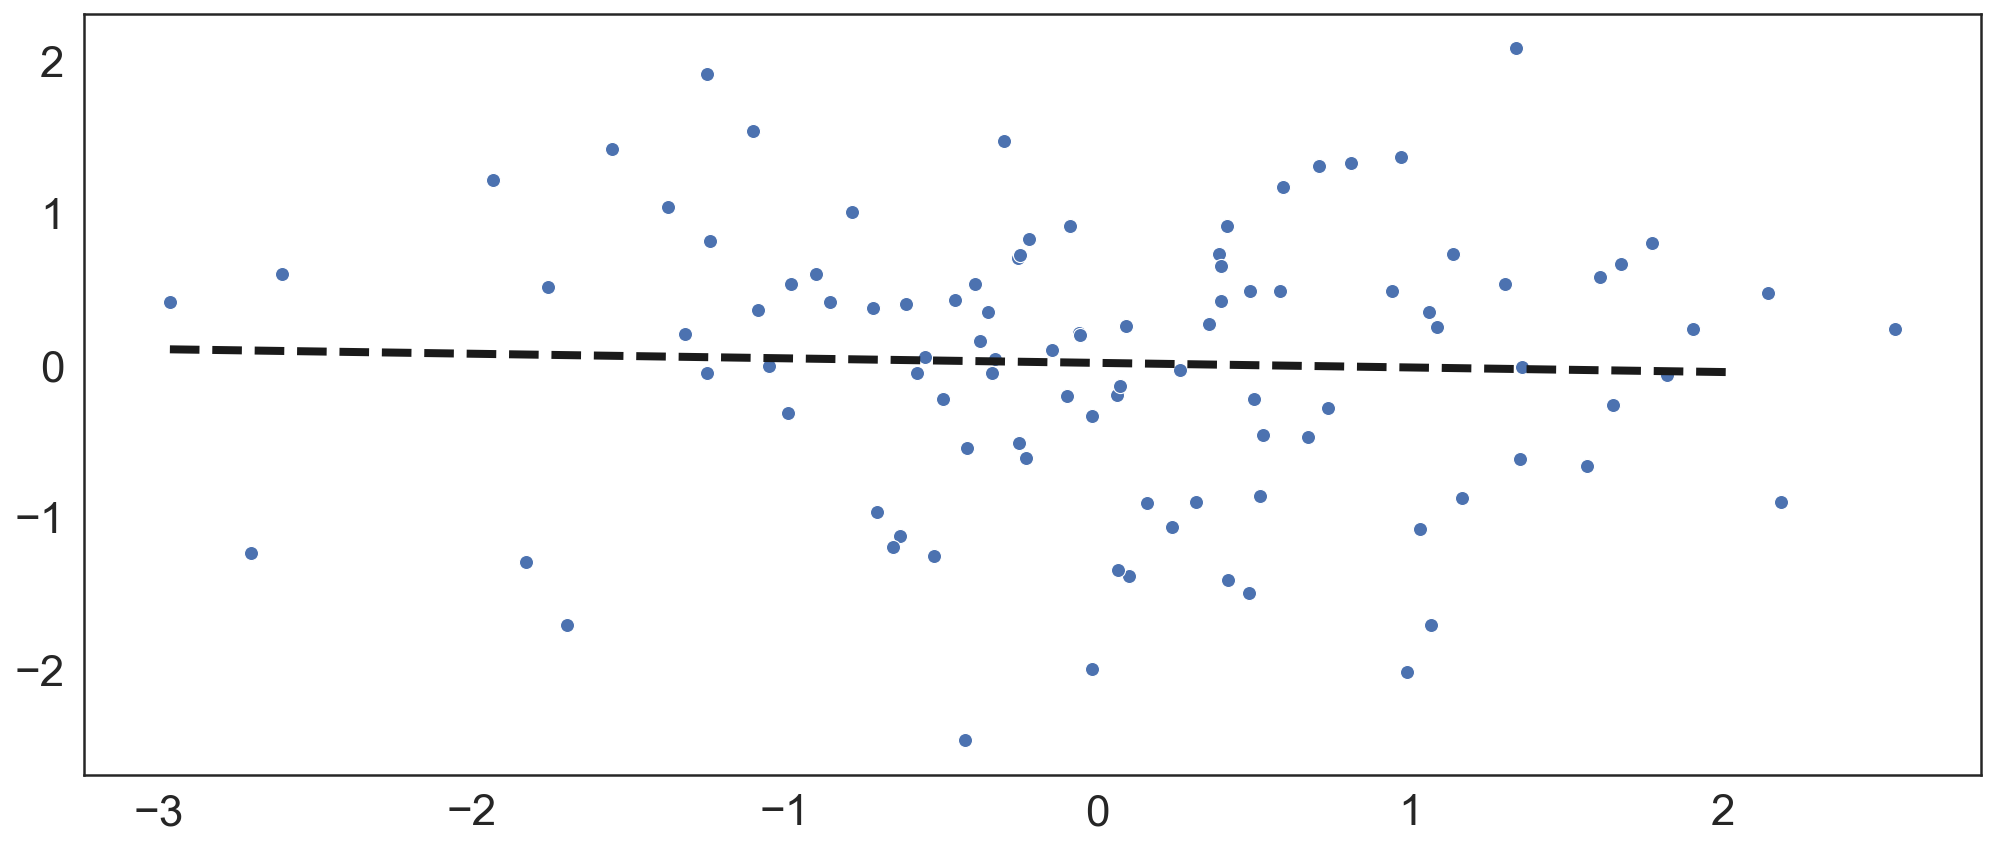

In [15]:
## plot model for data
sns.scatterplot(x, y, s=50);

# Generate and plot the model fit line
xs = np.arange(x.min(), x.max())
ys = res.params[1] * xs + res.params[0]
plt.plot(xs, ys, '--k', linewidth=4, label='Model');

In [17]:
print('model beta: ' , res.params[1])
print('corr: ', pearsonr(x,y)[0])

model beta:  -0.030056695882126217
corr:  -0.0361300120183639


## The Data

Returning to the regression question we looked at last class:

In [ ]:
# read in file; specify that it is tab-separated file
df = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/index.txt', sep="\t")
df = df[df['ViolCrime'] < 50]
df.head()

### Clicker Question #2

What is most correlated with Viol Crime?

- A) PovPct
- B) Brth15to17
- C) Brth18to19
- D) TeenBrth

In [ ]:
df.corr()

Note that each variable is perfectly correlated with itself (b/c you're comparing the exact same values!)

`TeenBrth` is highly correlated with `Brth15to17` and `Brth18to19`....which makes sense as the latter are subsets of the former. 

Last lecture we saw that `PovPct` plays a role in `TeenBrth`, so it makes sense that these values are somewhat correlated.

In [ ]:
# run model
outcome, predictors = patsy.dmatrices('TeenBrth ~ PovPct', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

#### linear regression
$\beta_1 = 1.93$  

#### correlation
$r = 0.67$  
$R^2 =  0.45$

$R-squared$ ($R^2$) is equal to Pearson's correlation ($r$) squared.

**$R-squared$** is the percentage of the the $outcome$ variable variation that is explained by a linear model. It takes a value between 0 and 100%.

Here, 45.3% of the variation in Teen Birth ($outcome$) is explained by Poverty Percentage ($predictor$)

In [ ]:
## Plot the model fit line

# Plot the orginal data (as before)
sns.scatterplot(x='PovPct', y='TeenBrth', data=df, alpha=0.3, s=100);

# Generate and plot the model fit line
xs = np.arange(df['PovPct'].min(), df['PovPct'].max())
ys = 1.9292 * xs + 16.7423
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Poverty Percentage')
plt.ylabel('Teen Birth Rate')
plt.legend();

## Returning to multiple linear regression

- Visualizing the relationship
- Correlation coefficients


In [ ]:
sns.distplot(df['ViolCrime'])
plt.xlabel('Violent Crime')
#plt.ylabel('Count');

~Chat with your neighbor.~

What is your interpretation of these data?

Should this variable be used as is in our regression model? 
- If yes, why is that your conclusion?
- If no, why not? What could we do to use this variable?


### Clicker Question #3

Should this variable be used in our regression model as is? 
- A) Yes 
- B) No
- C) I don't know

In [ ]:
# add a new column 'Violent'
df['Violent'] = df['ViolCrime'].apply(lambda x: 0 if x < 6.7 else 1)
df.head()

In [ ]:
sns.boxplot(x='Violent', y='TeenBrth', data=df);

In [ ]:
outcome, predictors = patsy.dmatrices('TeenBrth ~ PovPct + Violent ', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

You may have noted above that there is an $R-squared$ and an $Adj R-squared$ in the model output.

Every time a predictor is added to a model, $R-Squared$ will increase, making you *think* you should add all the predictors.

$Adj R-Squared$ is adjusted to account for the number of predictors in a model (applies in multiple regression), allowing multiple models to be compared more accurately. 

#### One predictor (Poverty Percentage)
$R^2 = 0.45$  
$Adj R^2 = 0.44$



#### Two predictors (Violent and Poverty Percentage)
$R^2 = 0.61$  
$Adj R^2 = 0.59$

Comparison of the adjusted correlation coefficients suggests that even after adjusting for the fact that we're adding a second predictor, the second model explains more of the variance in the outcome variable, Teen Birth Rate.

### Clicker Question #4

How are you doing? 

- A) totally got it
- B) kinda got it
- C) neutral
- D) kinda confused
- E) super confused

## Visualizing multiple regression models

In [ ]:
# relationship between originalpredictor and outcome;
sns.scatterplot(x='PovPct', y='TeenBrth', 
                data=df, s=200);

In [ ]:
# color by Violent
sns.scatterplot(x='PovPct', y='TeenBrth', hue='Violent', 
                data=df, s=200 );

In [ ]:
# plot with regression line
sns.lmplot(x="PovPct", y="TeenBrth", hue="Violent", 
           data=df, ci=None, aspect=2.5);

$$ Teen Birth = 19.8 + (1.30  * Poverty Percentage) + (10.5 * Violent) $$

### Clicker Question #5

How are you doing? 

- A) totally got it
- B) kinda got it
- C) neutral
- D) kinda confused
- E) super confused

## Cautions about correlation

- Anscombe's Quartet: A Cautionary Tale
- Correlation != Causation

Code in this example taken from [here](https://matplotlib.org/gallery/specialty_plots/anscombe.html).

In [ ]:
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

In [ ]:
def fit(x):
    return 3 + 0.5 * x

xfit = np.array([np.min(x), np.max(x)])

plt.subplot(221)
plt.plot(x, y1, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'I', fontsize=20)

plt.subplot(222)
plt.plot(x, y2, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticks=(0, 10, 20), xticklabels=[],
         yticks=(4, 8, 12), yticklabels=[], )
plt.text(3, 12, 'II', fontsize=20)

plt.subplot(223)
plt.plot(x, y3, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.text(3, 12, 'III', fontsize=20)
plt.setp(plt.gca(), yticks=(4, 8, 12), xticks=(0, 10, 20))

plt.subplot(224)
xfit = np.array([np.min(x4), np.max(x4)])
plt.plot(x4, y4, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), yticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'IV', fontsize=20)

# verify the stats
pairs = (x, y1), (x, y2), (x, y3), (x4, y4)
for x, y in pairs:
    print('mean=%1.2f, std=%1.2f, r=%1.2f' % (np.mean(y), np.std(y),
          np.corrcoef(x, y)[0][1]))

plt.show()

## Correlation != Causation

Measures a relationship, but neither correlation nor linear regression can say one variable _causes_ the other.

![](img/maine_margarine.png)

Source: http://www.tylervigen.com/spurious-correlations 

![](img/pool_cage.png)

Source: http://www.tylervigen.com/spurious-correlations 


# Difference in means: t-test

The t-test tests for a difference in means between groups.

Student's t-test assumptions:

- Data are continuous
- Normally distributed
- Large enough sample size
- Equal variance b/w groups


$H_0: \bar x = \bar y$

$H_a: \bar x \ne \bar y$

In [ ]:
df.groupby(['Violent'])['TeenBrth'].mean()

$H_0: \bar x_{ViolentTeenBirthRate} = \bar y_{NotViolentTeenBirthRate}$

$H_a: \bar x_{ViolentTeenBirthRate} \ne \bar y_{NotViolentTeenBirthRate}$

In [ ]:
group1 = df.where(df.Violent==0).dropna()['TeenBrth']
group2 = df.where(df.Violent==1).dropna()['TeenBrth']

In [ ]:
ttest_ind(group1, group2)

The p-value here is $1.08\times 10^{-7}$ ...which means that observing this difference in means due to random chance alone is very unlikely. 

We reject the null in favor of the alternative hypothesis, concluding that the means between the groups are not the same and that violence plays a role on Teen Birth Rate.

### Clicker Question #6

To understand the relationship between height and gender in this classroom, what would you use?

- A) linear regression
- B) correlation
- C) t-test
- D) something else